In [594]:
import pip
# pip.main(['install', '{insert_pckg_here}'])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data normalization and standardization 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from fancyimpute import KNN

#Training and testing split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
#from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import svm

#Evalution
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

## Loading Training/Testing Data:

In [595]:
train_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/train.csv'
test_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/test.csv'

train_df = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
test_df = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing:

In [596]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [597]:
# drop the columns where majority of their values are missing
# train_df = train_df.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis = 1)
# train_df.head()

In [598]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for quality related columns (ExterQual, BsmtQual)
quality_ratings = {
 'NA':0,
 '0':0,
 'Po':0.2, 
 'Fa':0.4, 
 'TA':0.6, 
 'Gd':0.8, 
 'Ex':1
}

In [599]:
# Converting category labels to numerical values for ExterQual column
train_df['ExterQual'] = train_df.ExterQual.map(quality_ratings)
test_df['ExterQual'] = test_df.ExterQual.map(quality_ratings)

# Converting category labels to numerical values for ExterCond column
train_df['ExterCond'] = train_df.ExterCond.map(quality_ratings)
test_df['ExterCond'] = test_df.ExterCond.map(quality_ratings)

In [600]:
# Converting category labels to numerical values for BsmtQual column
train_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)
test_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)

# Converting category labels to numerical values for BsmtCond column
train_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)
test_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)

In [601]:
# Converting category labels to numerical values for HeatingQC column
train_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)
test_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)

In [602]:
# Converting category labels to numerical values for FireplaceQu column
train_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)
test_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)

In [603]:
# Converting category labels to numerical values for KitchenQual column
train_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)
test_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)

In [604]:
# Converting category labels to numerical values for GarageQual column
train_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)
test_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)

# Converting category labels to numerical values for GarageCond column
train_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)
test_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)

In [605]:
# Converting category labels to numerical values for PoolQC column
train_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)
test_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)

In [606]:
train_df['CentralAir'] = train_df.CentralAir.map(
{'Y': 1,
 'N': 0})
train_df['PavedDrive'] = train_df.PavedDrive.map(
{'Y': 1,
 'N': 0.5,
 'P': 0})
train_df.head()

test_df['CentralAir'] = train_df.CentralAir.map(
{'Y': 1,
 'N': 0})
test_df['PavedDrive'] = train_df.PavedDrive.map(
{'Y': 1,
 'N': 0.5,
 'P': 0})
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [607]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for basemtnt ratings related columns (BsmtFinType1, BsmtFinType2)
basement_ratings = {
 'GLQ': 6,
 'ALQ': 5,
 'BLQ': 4,
 'Rec': 3,
 'LwQ': 2,
 'Unf': 1,
 'NA': 0
}

In [608]:
# Converting category labels to numerical values for BsmtFinType1 column
train_df['BsmtFinType1'] = train_df.BsmtFinType1.map(basement_ratings)
test_df['BsmtFinType1'] = train_df.BsmtFinType1.map(basement_ratings)

# Converting category labels to numerical values for BsmtFinType2 column
train_df['BsmtFinType2'] = train_df.BsmtFinType2.map(basement_ratings)
test_df['BsmtFinType2'] = train_df.BsmtFinType2.map(basement_ratings)

In [609]:
train_df['BsmtExposure'] = train_df.BsmtExposure.map(
{
 'Gd': 4,
 'Av': 3,
 'Mn': 2,
 'No': 1,
 'NA': 0 
})

test_df['BsmtExposure'] = train_df.BsmtExposure.map(
{
 'Gd': 4,
 'Av': 3,
 'Mn': 2,
 'No': 1,
 'NA': 0 
})

In [610]:
slopes = {
 "Sev" : 1,
 "Mod" : 2,
 "Gtl" : 3
}
train_df["LandSlope"] = train_df.LandSlope.map(slopes)
test_df["LandSlope"] = test_df.LandSlope.map(slopes)

In [611]:
contours = {
 "Low" : 1,
 "HLS" : 2,
 "Bnk" : 3,
 "Lvl" : 4
}

train_df["LandContour"] = train_df.LandContour.map(contours)
test_df["LandContour"] = test_df.LandContour.map(contours)

In [612]:
train_df = train_df.replace(np.NaN, 0)

In [613]:
train_df = pd.get_dummies(data=train_df , columns=['MSZoning','Street', 'Alley', 'LotShape',
                                                   'Utilities', 'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                   'MasVnrType', 'Foundation', 'BsmtExposure',
                                                   'Heating', 'Electrical', 'Functional', 'GarageType',
                                                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType',
                                                   'SaleCondition'])
train_df.head()

test_df = pd.get_dummies(data=test_df , columns=['MSZoning','Street', 'Alley', 'LotShape',
                                                   'Utilities', 'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                   'MasVnrType', 'Foundation', 'BsmtExposure',
                                                   'Heating', 'Electrical', 'Functional', 'GarageType',
                                                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType',
                                                   'SaleCondition'])
test_df.head()

,MSSubClass,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,4,3,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,4,3,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,4,3,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,4,3,6,6,1998,1998,20.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,2,3,8,5,1992,1992,0.0,...,0,0,0,1,0,0,0,0,1,0


In [614]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing


In [615]:
train_df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
LandContour              0
LandSlope                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 245, dtype: int64

## Exploratory Data Analysis (EDA)

In [616]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'] = round(corr_matrix['SalePrice'],4)
corr_matrix['SalePrice']

MSSubClass              -0.0843
LotFrontage              0.2096
LotArea                  0.2638
LandContour             -0.0730
LandSlope               -0.0512
                          ...  
SaleCondition_AdjLand   -0.0507
SaleCondition_Alloca    -0.0155
SaleCondition_Family    -0.0465
SaleCondition_Normal    -0.1540
SaleCondition_Partial    0.3521
Name: SalePrice, Length: 245, dtype: float64

## Data Exploration:

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

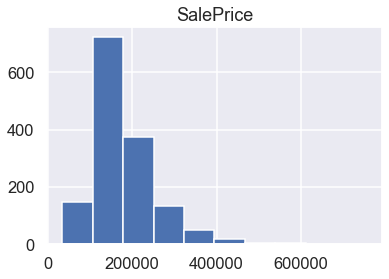

In [617]:
# check distribution of sales price
train_df.hist(column='SalePrice')

array([[<AxesSubplot:title={'center':'LogPrice'}>]], dtype=object)

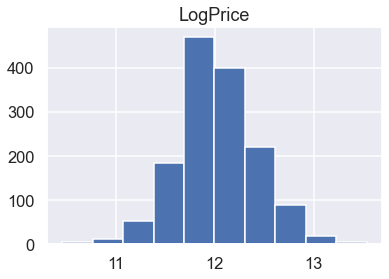

In [618]:
# normalize sale price so that it can be evenly distributed
train_df['LogPrice'] = np.log(train_df.SalePrice)
train_df.hist(column='LogPrice')

In [619]:
# check for more skewed columns
train_df.skew().sort_values(ascending=False).head(30)

MiscFeature_TenC        38.209946
Exterior2nd_CBlock      38.209946
Exterior1st_CBlock      38.209946
Electrical_0            38.209946
Exterior1st_ImStucc     38.209946
Exterior1st_AsphShn     38.209946
RoofMatl_Roll           38.209946
RoofMatl_Membran        38.209946
Condition2_RRAn         38.209946
Functional_Sev          38.209946
Condition2_PosA         38.209946
Utilities_NoSeWa        38.209946
Condition2_RRAe         38.209946
RoofMatl_Metal          38.209946
RoofMatl_ClyTile        38.209946
Electrical_Mix          38.209946
Heating_Floor           38.209946
Exterior2nd_Other       38.209946
Heating_OthW            26.990701
MiscFeature_Othr        26.990701
Neighborhood_Blueste    26.990701
SaleType_Con            26.990701
RoofStyle_Shed          26.990701
Condition2_PosN         26.990701
Exterior1st_Stone       26.990701
Exterior1st_BrkComm     26.990701
MiscFeature_Gar2        26.990701
Condition2_Artery       26.990701
Condition1_RRNe         26.990701
Condition2_RRN

In [620]:
# looking at correlation of numeric features to SalePrice column. 
# this will suggest which columns have a greater relationship with the SalePrice column 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['LogPrice']
corr = corr.iloc[1:]
corr = pd.DataFrame(corr, columns = ['Correlation'])

corr = corr[corr.Correlation > 0.50]
corr

,Correlation
SalePrice,0.948374
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
ExterQual,0.678840
KitchenQual,0.667893
GarageArea,0.650888
BsmtQual,0.615804
TotalBsmtSF,0.612134
1stFlrSF,0.596981


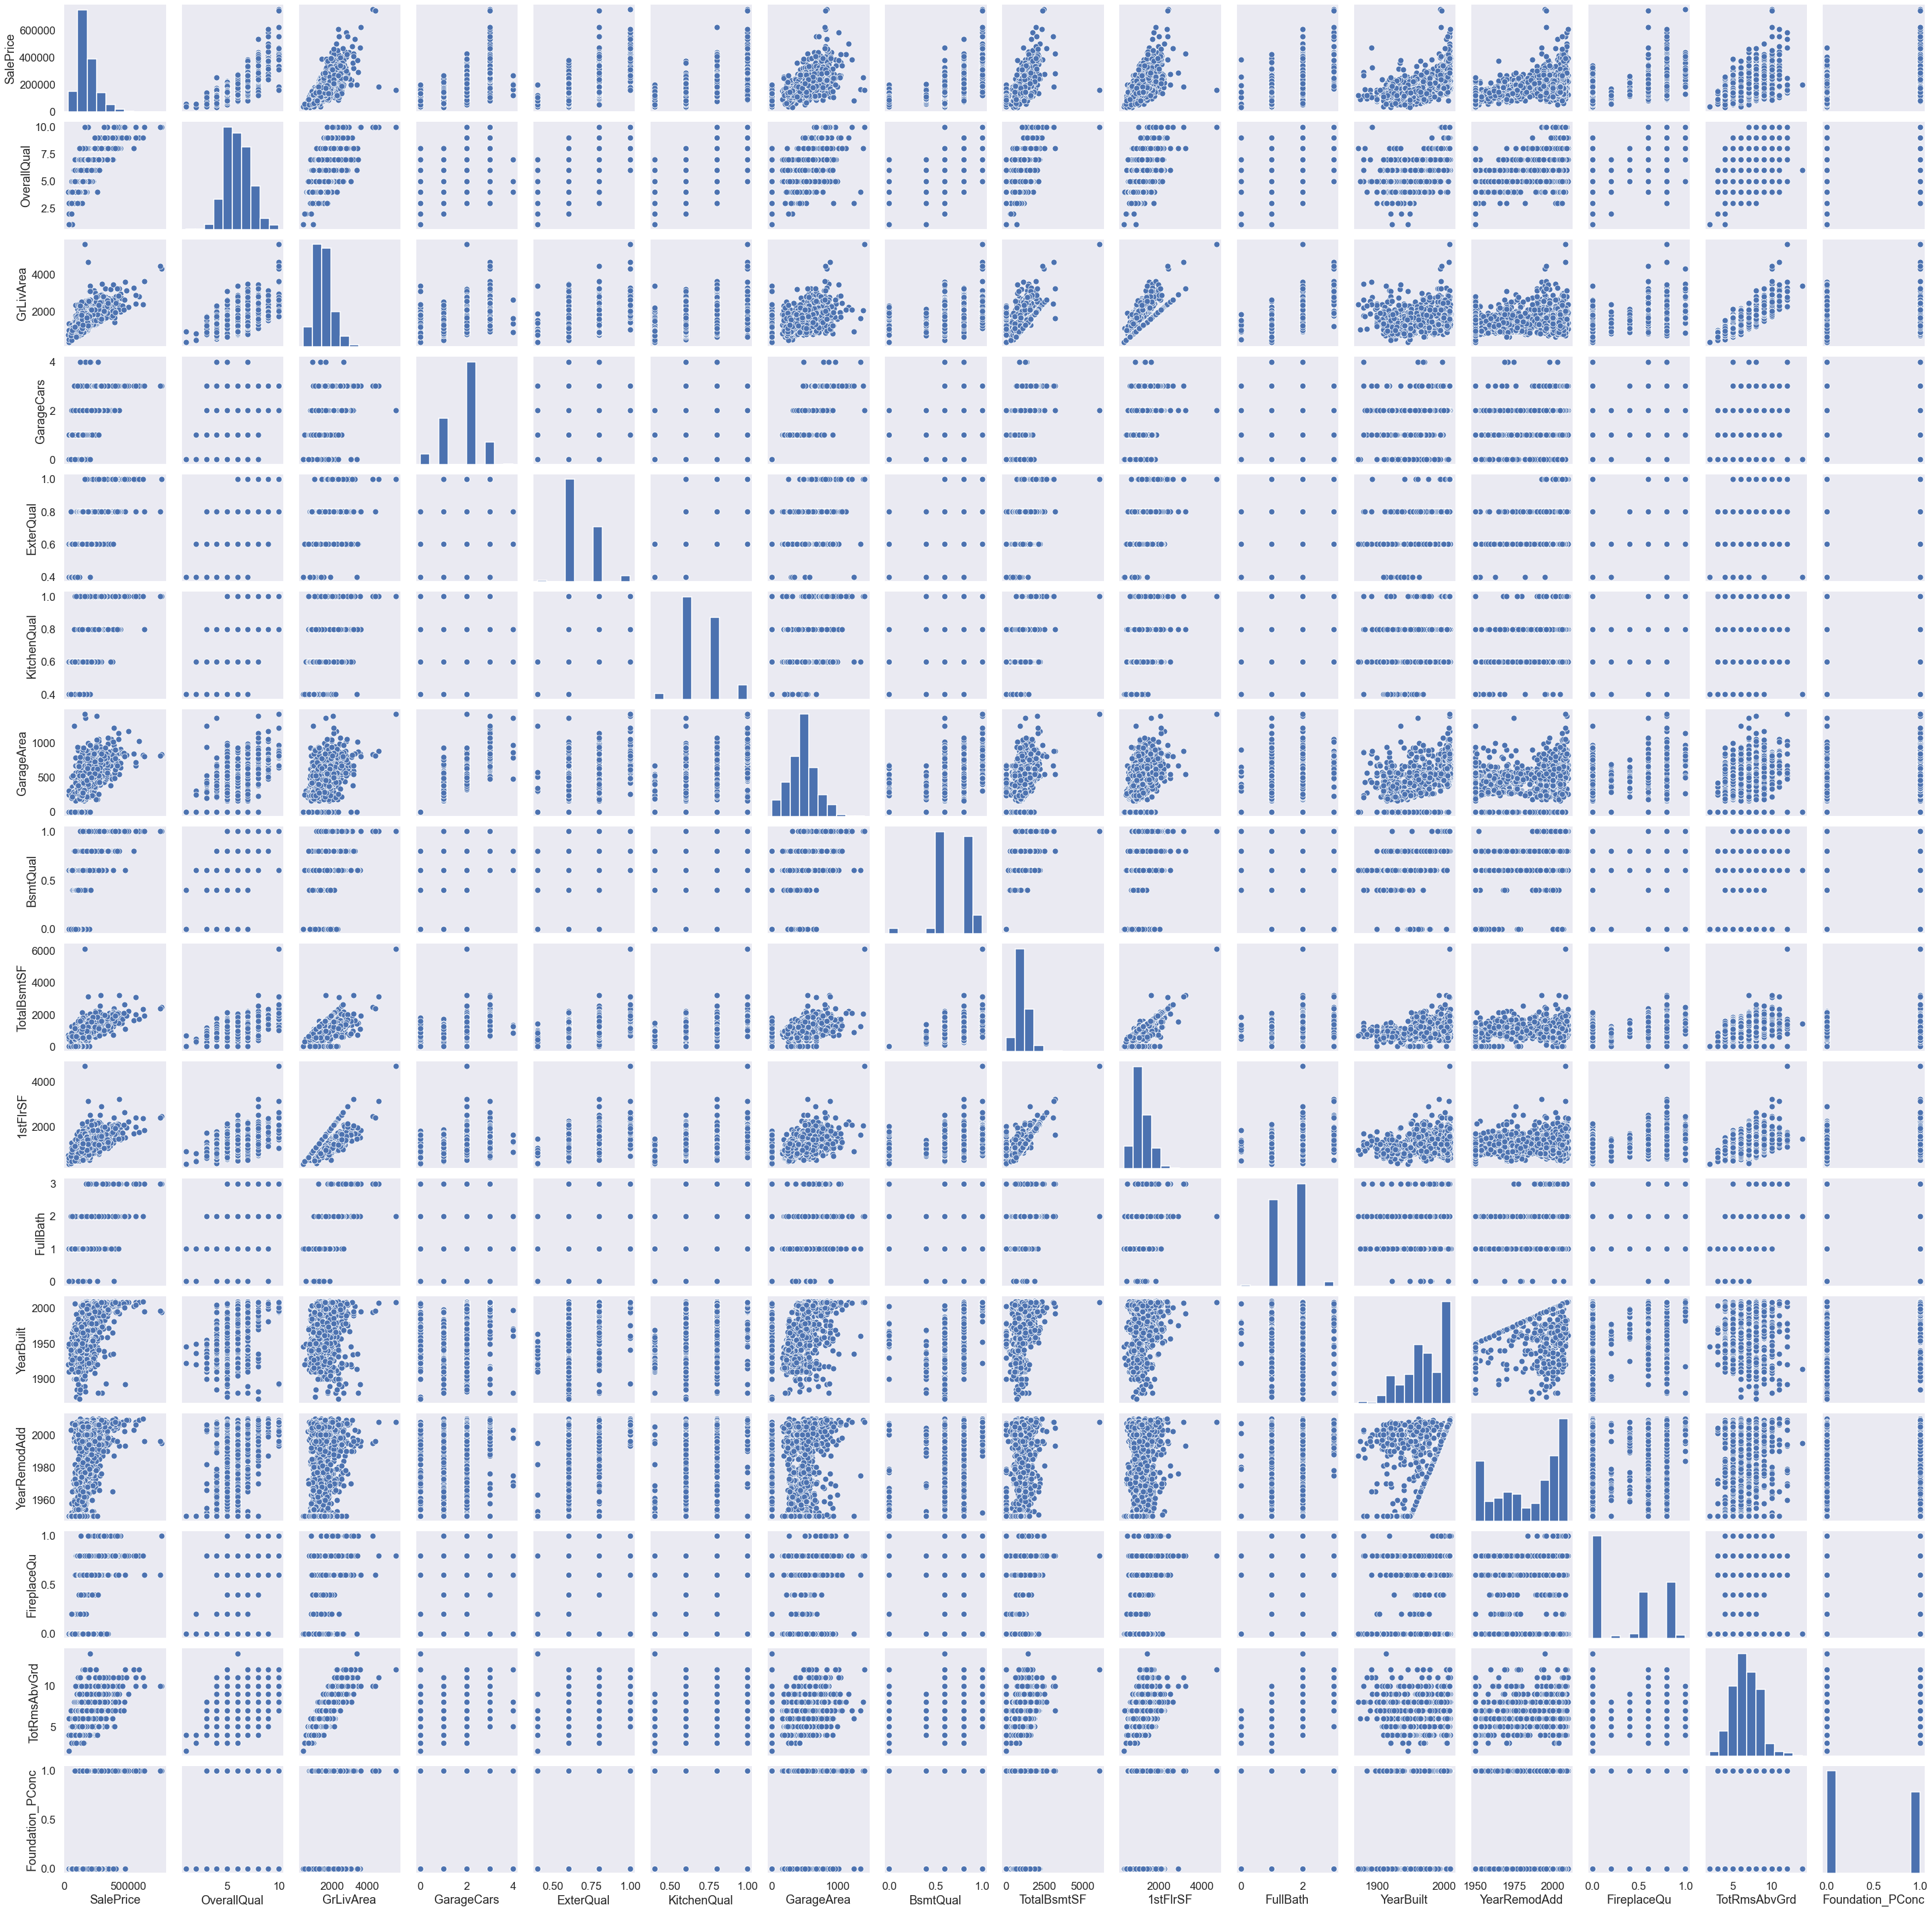

In [621]:
cols = []
for ind in corr.index:
    cols.append(ind)

# create pair plot between columns that have correlation 50% and above
sns.pairplot(train_df[cols])

## Data Visualization (CAN BE DELETED):

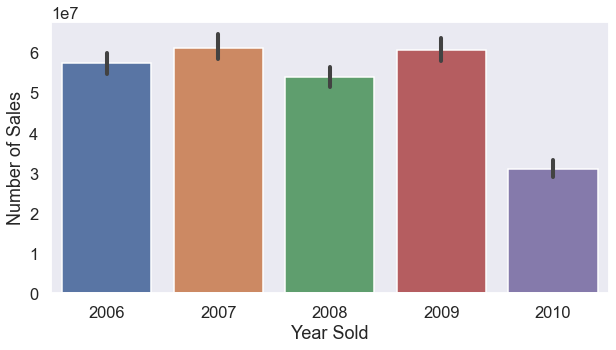

In [622]:
#Count the number of houses sold in a year
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc='count')
#print(year_sold_pivot)

# Plotting the sum of sales per year
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=sum)
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.show()

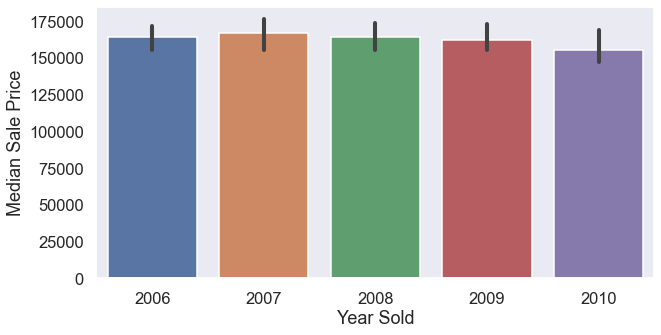

In [623]:
# Plotting the median sale price for each year

#Checking the median price
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.median)
#print(year_sold_pivot)

sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=np.median)
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

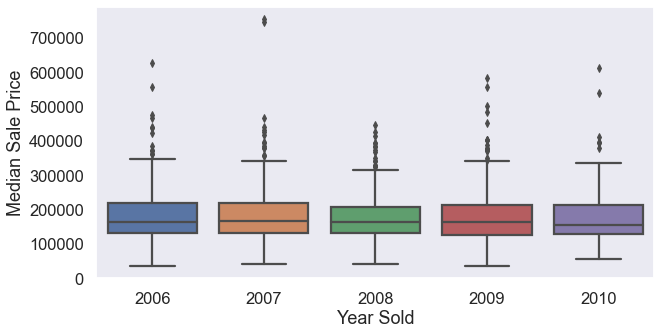

In [624]:
#Displaying the median price for each year using box plot.  
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']])
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

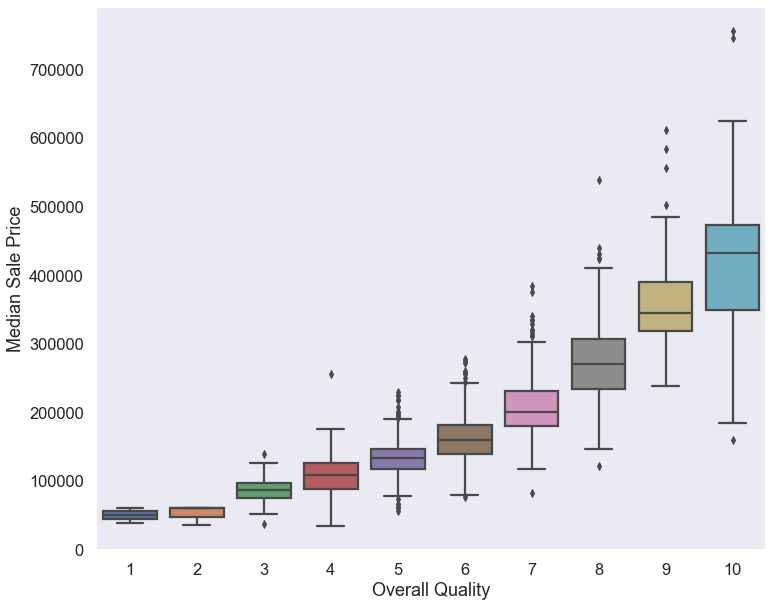

In [625]:
# Displaying the median price based on overall quality of the house using box plot.
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(12,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df[['SalePrice', 'OverallQual']])
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

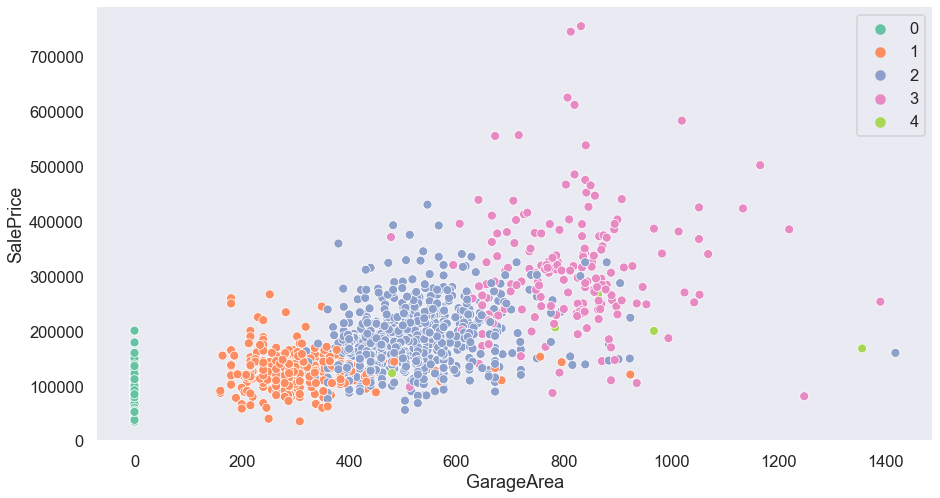

In [626]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot GarageArea vs sale price of house considering the number of cars that can
# fit in the garage
sns.scatterplot(x='GarageArea', y='SalePrice', hue=train_df.GarageCars.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'GarageArea','GarageCars']])
plt.show()

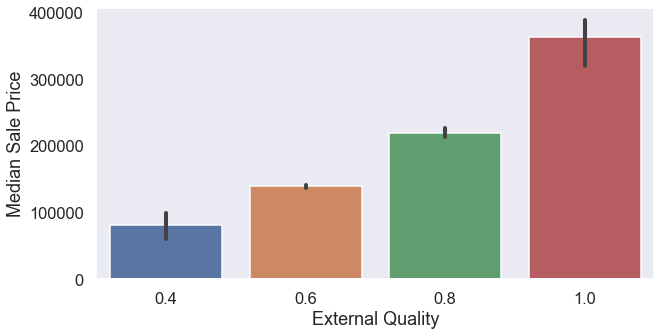

In [627]:
# Plotting the median sale price based on external quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='ExterQual', y='SalePrice', data=train_df[['SalePrice', 'ExterQual']], estimator=np.median)
plt.xlabel('External Quality')
plt.ylabel('Median Sale Price')
plt.show()

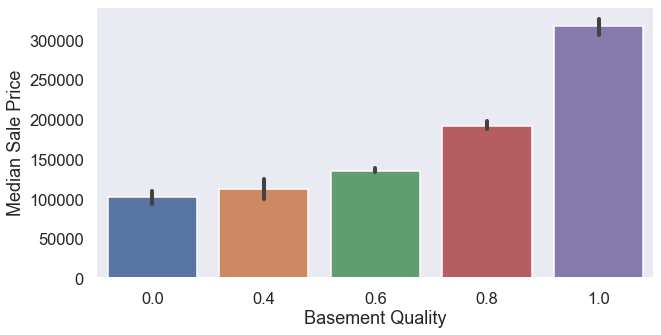

In [628]:
# Plotting the median sale price based on basement quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='BsmtQual', y='SalePrice', data=train_df[['SalePrice', 'BsmtQual']], estimator=np.median)
plt.xlabel('Basement Quality')
plt.ylabel('Median Sale Price')
plt.show()

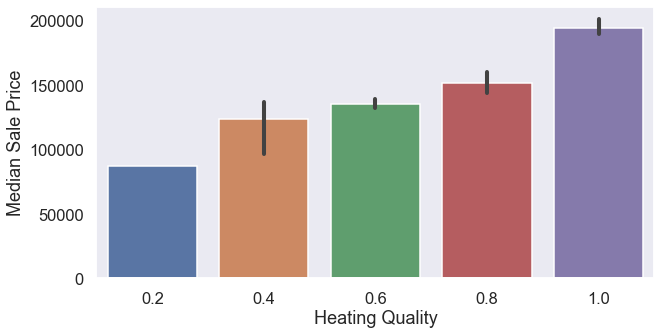

In [629]:
# Plotting the median sale price based on heating and air conditioning quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='HeatingQC', y='SalePrice', data=train_df[['SalePrice', 'HeatingQC']], estimator=np.median)
plt.xlabel('Heating Quality')
plt.ylabel('Median Sale Price')
plt.show()

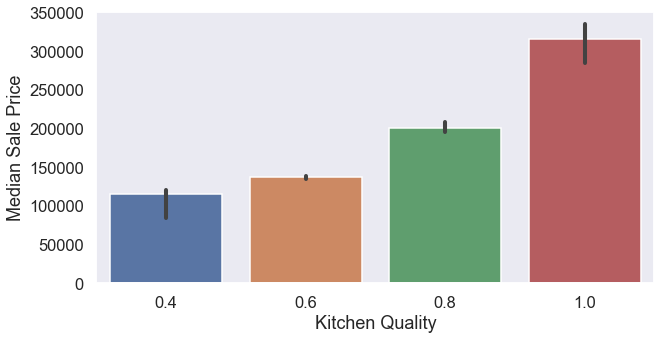

In [630]:
# Plotting the median sale price based on kitchen quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df[['SalePrice', 'KitchenQual']], estimator=np.median)
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.show()

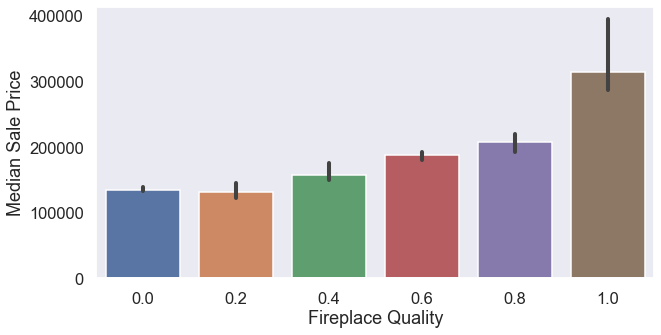

In [631]:
# Plotting the median sale price based on fireplace quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='FireplaceQu', y='SalePrice', data=train_df[['SalePrice', 'FireplaceQu']], estimator=np.median)
plt.xlabel('Fireplace Quality')
plt.ylabel('Median Sale Price')
plt.show()

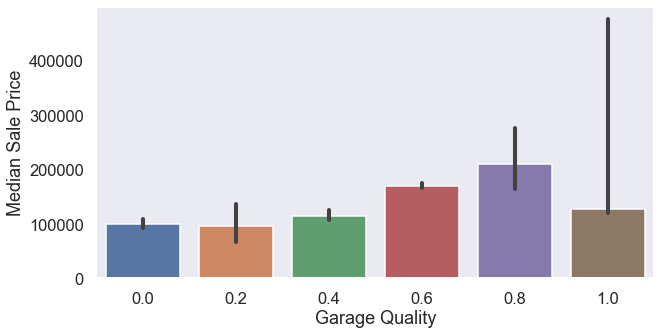

In [632]:
# Plotting the median sale price based on garage quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='GarageQual', y='SalePrice', data=train_df[['SalePrice', 'GarageQual']], estimator=np.median)
plt.xlabel('Garage Quality')
plt.ylabel('Median Sale Price')
plt.show()

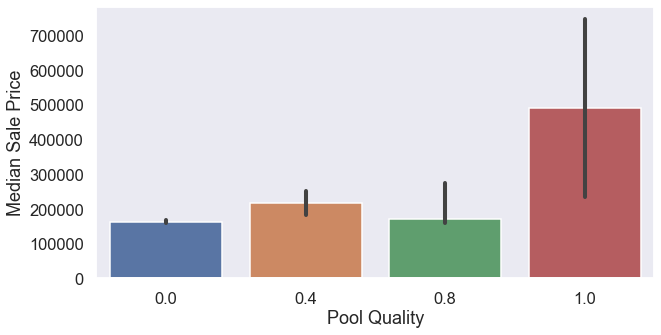

In [633]:
# Plotting the median sale price based on pool quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='PoolQC', y='SalePrice', data=train_df[['SalePrice', 'PoolQC']], estimator=np.median)
plt.xlabel('Pool Quality')
plt.ylabel('Median Sale Price')
plt.show()

## Feature Engineering:

In [634]:
# sum of quality points.
train_df['SumQuality_'] = train_df.ExterQual + train_df.BsmtQual + train_df.HeatingQC + train_df.KitchenQual + train_df.GarageQual + train_df.FireplaceQu + train_df.GarageQual + train_df.PoolQC 
test_df['SumQuality_'] = test_df.ExterQual + test_df.BsmtQual + test_df.HeatingQC + test_df.KitchenQual + test_df.GarageQual + test_df.FireplaceQu + test_df.GarageQual + test_df.PoolQC 
              
#print(train_df['SumQuality'])

# sum of quality points, removing less correlated features (< 0.5).
train_df['SumMIQ_'] = train_df.ExterQual + train_df.BsmtQual + train_df.KitchenQual + train_df.FireplaceQu + train_df.GarageQual
test_df['SumMIQ_'] = test_df.ExterQual + test_df.BsmtQual + test_df.KitchenQual + test_df.FireplaceQu + test_df.GarageQual

In [635]:
# Garage area per car
train_df['GarageAreaPerCar_'] = train_df.GarageArea / train_df.GarageCars 
train_df.GarageAreaPerCar_.fillna(0, inplace=True) 

test_df['GarageAreaPerCar_'] = test_df.GarageArea / test_df.GarageCars 
test_df.GarageAreaPerCar_.fillna(0, inplace=True) 

#Age of garage
train_df['GarageAge_'] = train_df.YrSold - train_df.GarageYrBlt
test_df['GarageAge_'] = test_df.YrSold - test_df.GarageYrBlt

#Age of house
train_df['Age_'] = train_df.YrSold - train_df.YearBuilt
test_df['Age_'] = test_df.YrSold - test_df.YearBuilt

#Age of house remodelling
train_df['RemodelAge_'] = train_df.YrSold - train_df.YearRemodAdd
test_df['RemodelAge_'] = test_df.YrSold - test_df.YearRemodAdd

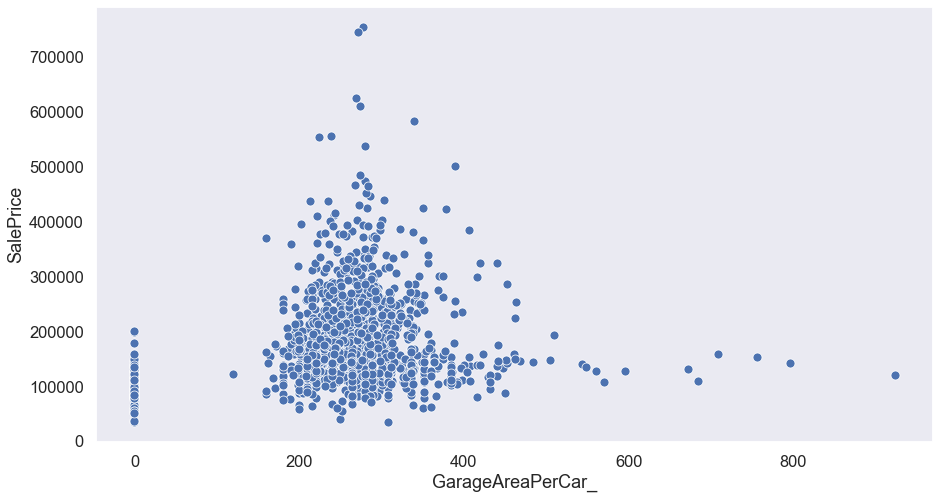

In [636]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot garage area per car vs sale price of house
sns.scatterplot(x='GarageAreaPerCar_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'GarageAreaPerCar_']])
plt.show()

In [637]:
# summing developed areas (indoor and outdoor)
train_df['IndoorArea_'] = train_df.GrLivArea + train_df.TotalBsmtSF + train_df.GarageArea
test_df['IndoorArea_'] = test_df.GrLivArea + test_df.TotalBsmtSF + test_df.GarageArea

train_df['OutdoorArea_'] = train_df.WoodDeckSF + train_df.OpenPorchSF + train_df.EnclosedPorch + train_df['3SsnPorch'] + train_df.ScreenPorch + train_df.MasVnrArea + train_df.PoolArea
test_df['OutdoorArea_'] = test_df.WoodDeckSF + test_df.OpenPorchSF + test_df.EnclosedPorch + test_df['3SsnPorch'] + test_df.ScreenPorch + test_df.MasVnrArea + test_df.PoolArea

train_df['DevelopedArea_'] = train_df.IndoorArea_+ train_df.OutdoorArea_
test_df['DevelopedArea_'] = test_df.IndoorArea_ + test_df.OutdoorArea_

train_df['LotAreaBySlope_'] = train_df.LotArea * train_df.LandSlope
test_df['LotAreaBySlope_'] = test_df.LotArea * test_df.LandSlope

train_df['LotAreaByContour_'] = train_df.LotArea * train_df.LandContour
test_df['LotAreaByContour_'] = test_df.LotArea * test_df.LandContour

#train_df['InsideOutsideRatio'] = train_df.IndoorArea / train_df.OutdoorArea

#train_df['FloorRatio'] = train_df['2ndFlrSF'] / train_df['1stFlrSF']

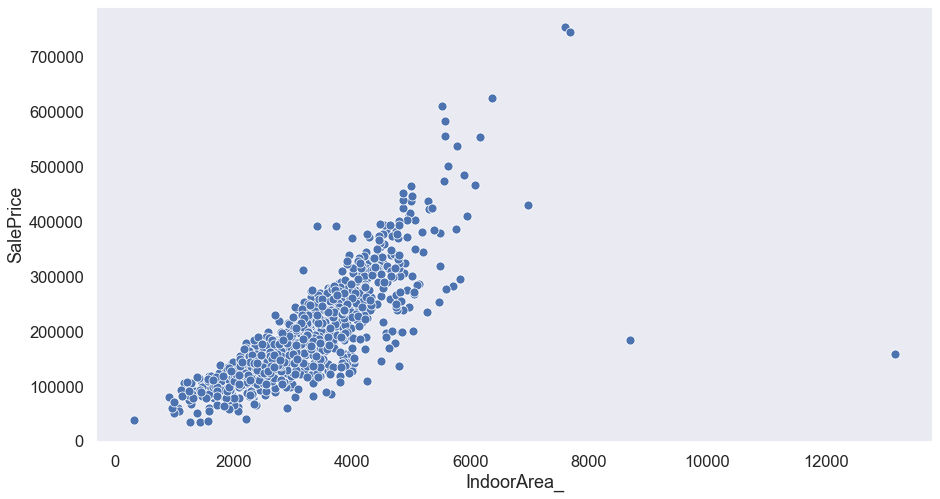

In [638]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total indoor area vs sale price of house
sns.scatterplot(x='IndoorArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'IndoorArea_']])
plt.show()

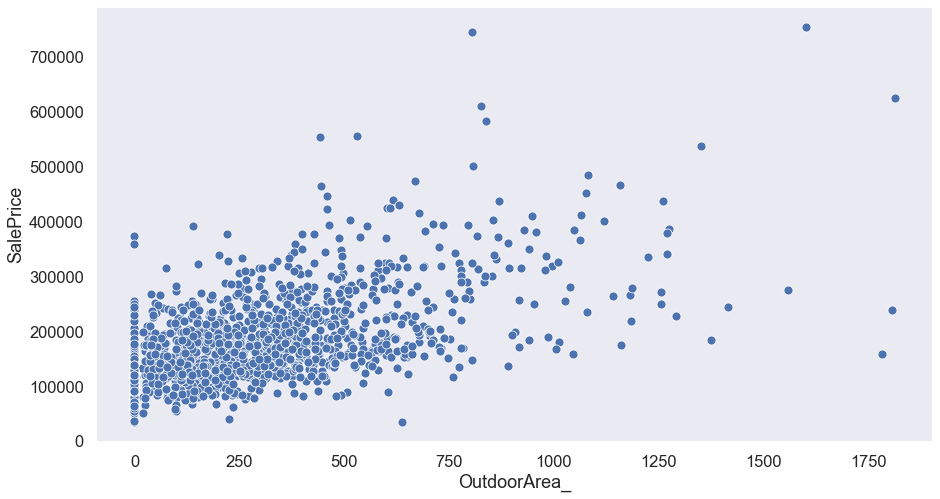

In [639]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total outdoor area vs sale price of house considering the building type
sns.scatterplot(x='OutdoorArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'OutdoorArea_']])
plt.show()

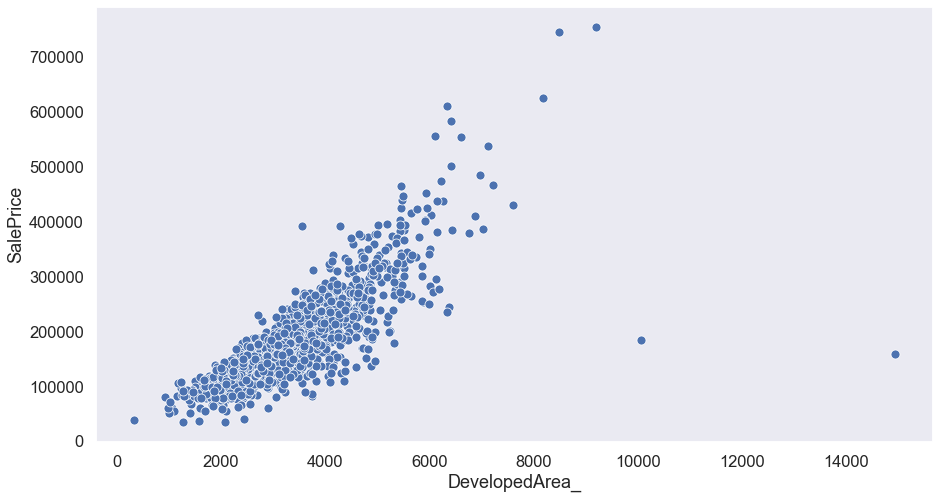

In [640]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total area that has been built out (nothing has been built on it) vs sale price of house
# considering the building type
sns.scatterplot(x='DevelopedArea_', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'DevelopedArea_']])
plt.show()

In [641]:
train_df['IsNew_'] = train_df.Age_.map(lambda x: 0 if x > 0 else 1)
test_df['IsNew_'] = test_df.Age_.map(lambda x: 0 if x > 0 else 1)

train_df['IsRemodelled_'] = train_df.RemodelAge_.map(lambda x: 0 if x > 0 else 1)
test_df['IsRemodelled_'] = test_df.RemodelAge_.map(lambda x: 0 if x > 0 else 1)

In [644]:
train_df['TotalBathRms_'] = train_df.FullBath + (train_df.HalfBath * 0.5) + train_df.BsmtFullBath + (train_df.BsmtHalfBath * 0.5)
    
test_df['TotalBathRms_'] = test_df.FullBath + (test_df.HalfBath * 0.5) + test_df.BsmtFullBath + (test_df.BsmtHalfBath * 0.5)

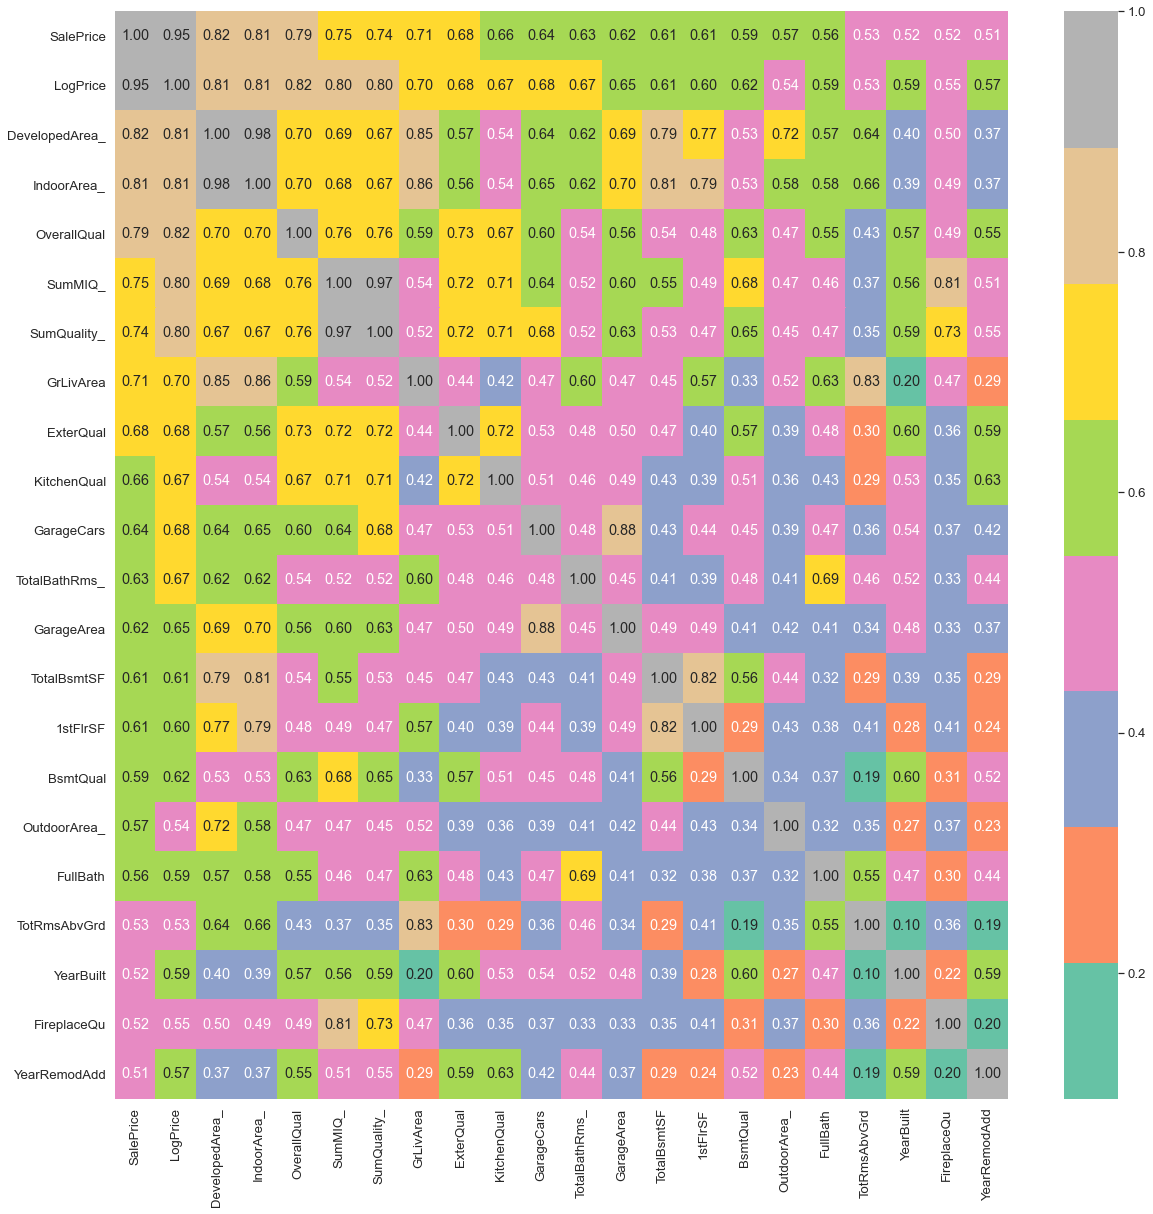

In [647]:
corr = train_df[train_df.SalePrice>1].corr()
highest_corr_cols = corr[abs((corr.SalePrice)>=.50)].SalePrice.sort_values(ascending=False).keys()
highest_corr = corr.loc[highest_corr_cols, highest_corr_cols]
plt.figure(figsize=(20, 20))
sns.heatmap(highest_corr, cmap='Set2', annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()
del corr, highest_corr

In [ ]:
#train_df.to_csv('output.csv')

In [649]:
features = list(['SalePrice', 'SumQuality_', 'SumMIQ_', 'GarageAge_', 'GarageAreaPerCar_', 'Age_', 'RemodelAge_',
                 'IndoorArea_', 'OutdoorArea_', 'LotAreaBySlope_', 'LotAreaByContour_',
                 'DevelopedArea_', 'IsNew_', 'IsRemodelled_', 'TotalBathRms_'])
corr = train_df[features].corr()['SalePrice']
print(corr)

SalePrice            1.000000
SumQuality_          0.740640
SumMIQ_              0.753830
GarageAge_          -0.261441
GarageAreaPerCar_    0.158189
Age_                -0.523350
RemodelAge_         -0.509079
IndoorArea_          0.807518
OutdoorArea_         0.569425
LotAreaBySlope_      0.375575
LotAreaByContour_    0.354396
DevelopedArea_       0.816964
IsNew_               0.224807
IsRemodelled_        0.335975
TotalBathRms_        0.631731
Name: SalePrice, dtype: float64


## Logistic Regression:

In [650]:
train_df.reset_index(drop=True, inplace=True)

y = np.log(train_df['SalePrice'])
X = train_df.drop(['SalePrice', 'LogPrice'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [-2.18187902e-04  1.07365264e-04 -1.32999106e-07  1.22723168e-02
 -1.95215965e-02  4.86541516e-02  3.63947712e-02  1.04637961e-03
  5.64130138e-04 -2.43003901e-04 -7.08172733e-02 -1.33436376e-01
  4.90669868e-02  4.12188312e-02  5.68810765e-03 -8.50311271e-07
 -4.36077037e-04 -8.68656990e-06 -5.05761783e-05 -6.01130803e-05
  1.89749110e-01  6.16359636e-02 -5.85606734e-05 -4.71735212e-05
  1.50016749e-04  4.42825502e-05  7.34056295e-03  3.10253838e-04
  3.21937016e-03  2.58222767e-02  9.36052820e-03 -3.61474819e-02
  2.19080608e-03  8.41327657e-03  2.96451079e-02 -5.57565025e-02
 -3.38302289e-05 -1.45306213e-02  5.44019853e-05  2.71147146e-01
 -1.30208181e-01  1.48610752e-02 -2.13331237e-04 -2.73730570e-04
 -1.15886506e-04 -1.03418319e-04 -1.17523238e-05  1.07837567e-03
 -7.87980017e-01  1.87862882e-05  7.82391686e-04  2.41462346e-04
 -2.68314455e-01  9.71411134e-02  6.50718272e-02  6.11483135e-02
  4.49532012e-02 -3.62013933e-02  3.62013933e-02 -2.60856574e-02
 -9.12605

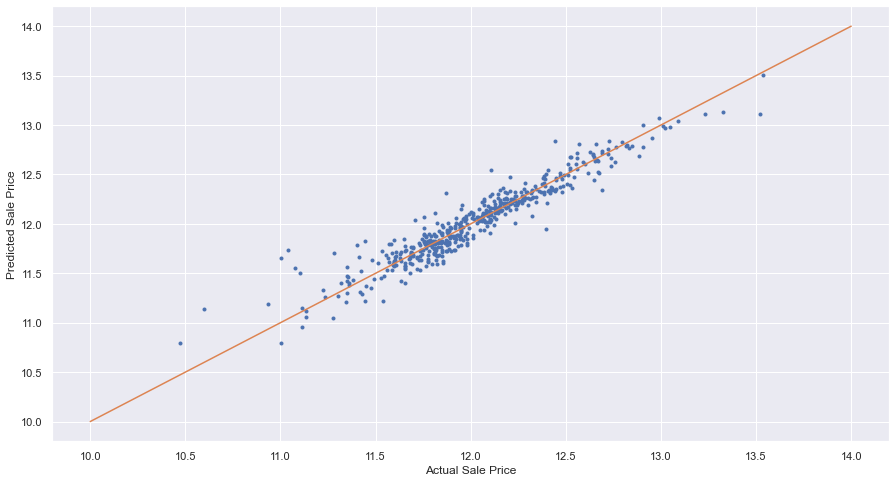

In [651]:
# plot prediction and actual data
plt.figure(figsize=(15,8))
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(10, 14, 20)
y = x
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot(x, y)
plt.show()